# Assignment 5

## Using Dataset 5

In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
from random import sample, seed
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict
import sys

In [2]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [3]:
# Load the /.edges files
# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [4]:
# Basic attributes check
print("Number of nodes = {}, edges = {} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes = {}, edges = {} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes = 168, edges = 1656 in facebook graph.
Number of nodes = 129, edges = 8037 in Twitter graph.


## Question A

### Please randomly choose two sets of nodes in Facebook-Ego dataset (each consists of 50 nodes without repetition), and calculate the cut size and conductance between the two sets of nodes. Please also plot the partitioning

In [6]:
# Get random sample of 100 nodes
seed(12345)
samp_nodes_facebook = sample(list(graphFacebook.nodes()), 100)

# Each sample should have 50 nodes without repetition
setA_nodes = samp_nodes_facebook[:50]
setB_nodes = samp_nodes_facebook[50:]

# Check split is correct
print("Length of set 1 is {}".format(len(setA_nodes)))
print("Length of set 2 is {}".format(len(setB_nodes)))

def question_a_result(graph, A, B):
    """returns answers to question A
    Args:
        graph (_type_): Graph
        S (list): Set A
        T (list): Set B
    """
    # Calculate cut size
    result_cut_size = nx.cut_size(graph, A, B)
    print("The cut size between the two set of nodes is: {}".format(result_cut_size))
    
    # Calculate conductance
    result_conductance = nx.conductance(graph, A, B)
    print("The conductance between the two set of nodes is: {}".format(result_conductance))
    
    return

# Display result
question_a_result(graph=graphFacebook, A=setA_nodes, B=setB_nodes)

Length of set 1 is 50
Length of set 2 is 50
The cut size between the two set of nodes is: 293
The conductance between the two set of nodes is: 0.30552659019812306


### Plot the partitioning

In [20]:
# Since I have the two set of nodes A, B, I will extract the final set --> Other that contains the remaining nodes in the network
others = set(graphFacebook.nodes()).difference(set(setA_nodes).union(set(setB_nodes)))
others = list(others)

# Plot the partitions
def plot_graph_partitions(graph, partitions, id, question):
    # Select colors to be used for the grouping
    community_colors = ["red", "blue", "black"]
    shapes = ["o", "s", "P"]
    
    # Get positions
    position = nx.spring_layout(graph)
    
    
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("Graph showing {} partitions.".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    
    labels = ['Set A', 'Set B', 'Other']
    
    for nodes, group_color, shape, label in zip(partitions, community_colors, shapes, labels):
        nx.draw_networkx_nodes(G=graph, pos=position, nodelist=nodes
                               , node_color=[group_color],node_shape=shape, node_size=13, label="Partition {}".format(label))

    nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)
    
    fig.tight_layout()
    plt.legend()
    plt.savefig("{}_{}_partitions.png".format(question, id), transparent=False)
    return

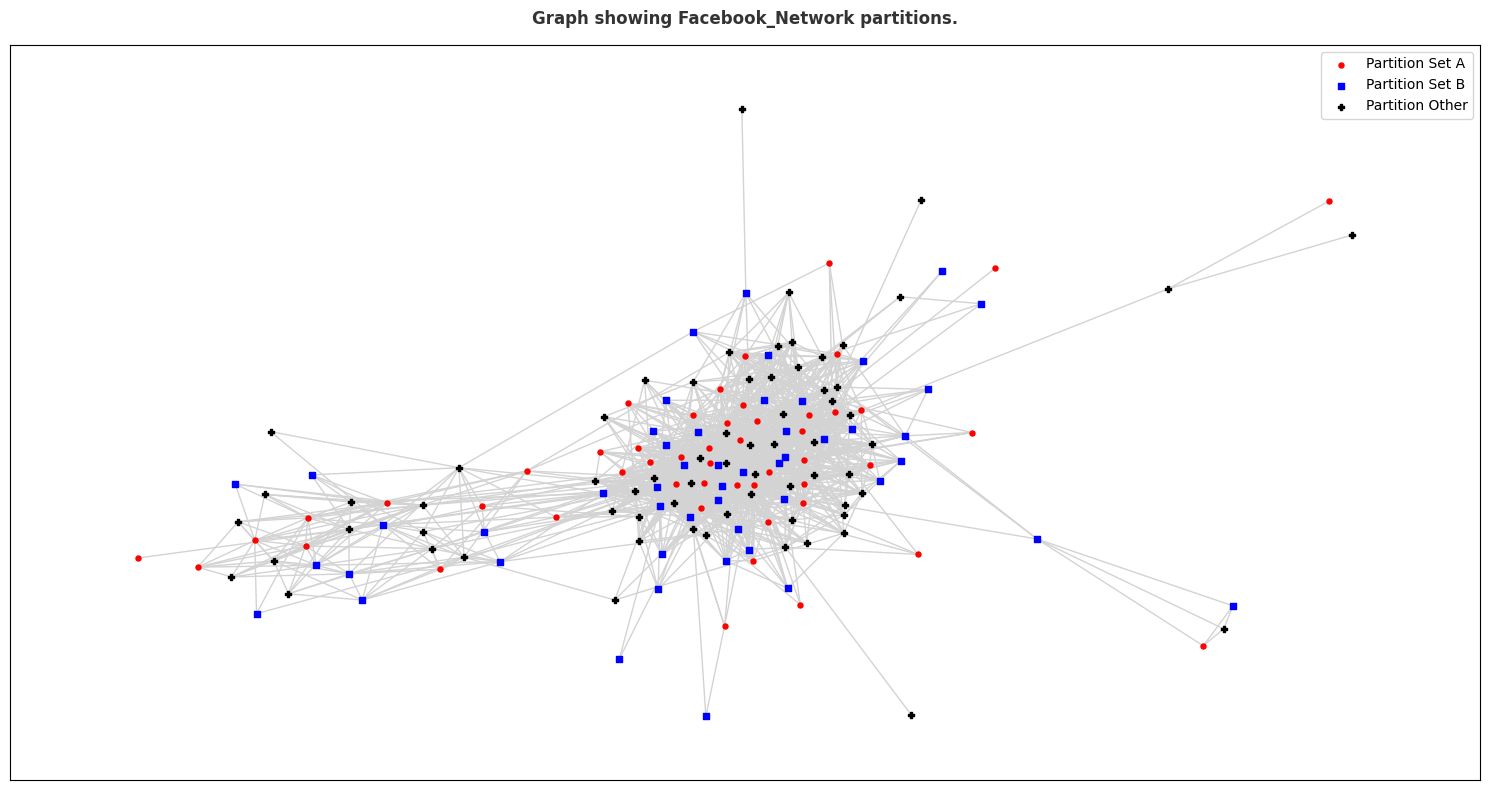

In [21]:
plot_graph_partitions(graph=graphFacebook, partitions=[setA_nodes, setB_nodes, others], id='Facebook_Network', question='A')

## Question B

### Please repeat the process mentioned in (a) again but with different sets of nodes. What differences have you observed? What cause the differences?

In [22]:
seed(54321)
samp_nodes_facebook = sample(list(graphFacebook.nodes()), 100)

# Each sample should have 50 nodes without repetition
setA_nodes = samp_nodes_facebook[:50]
setB_nodes = samp_nodes_facebook[50:]

# Check split is correct
print("Question B")
print("Length of set 1 is {}".format(len(setA_nodes)))
print("Length of set 2 is {}".format(len(setB_nodes)))

def question_b_result(graph, A, B):
    """returns answers to question A
    Args:
        graph (_type_): Graph
        S (list): Set A
        T (list): Set B
    """
    # Calculate cut size
    result_cut_size = nx.cut_size(graph, A, B)
    print("The cut size between the two set of nodes is: {}".format(result_cut_size))
    
    # Calculate conductance
    result_conductance = nx.conductance(graph, A, B)
    print("The conductance between the two set of nodes is: {}".format(result_conductance))
    
    return

# Display result
question_b_result(graph=graphFacebook, A=setA_nodes, B=setB_nodes)

Question B
Length of set 1 is 50
Length of set 2 is 50
The cut size between the two set of nodes is: 311
The conductance between the two set of nodes is: 0.349438202247191


In [26]:
# Plot partitions for B
# Since I have the two set of nodes A, B, I will extract the final set --> Other that contains the remaining nodes in the network
others = set(graphFacebook.nodes()).difference(set(setA_nodes).union(set(setB_nodes)))
others = list(others)

# Plot the partitions
def plot_graph_partitions(graph, partitions, id, question):
    # Select colors to be used for the grouping
    community_colors = ["orangered", "cornflowerblue", "forestgreen"]
    shapes = ["o", "s", "P"]
    
    # Get positions
    position = nx.spring_layout(graph)
    
    
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("Graph showing {} partitions.".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    
    labels = ['Set A', 'Set B', 'Other']
    
    for nodes, group_color, shape, label in zip(partitions, community_colors, shapes, labels):
        nx.draw_networkx_nodes(G=graph, pos=position, nodelist=nodes
                               , node_color=[group_color],node_shape=shape, node_size=13, label="Partition {}".format(label))

    nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)
    
    fig.tight_layout()
    plt.legend()
    plt.savefig("{}_{}_partitions.png".format(question, id), transparent=False)
    return

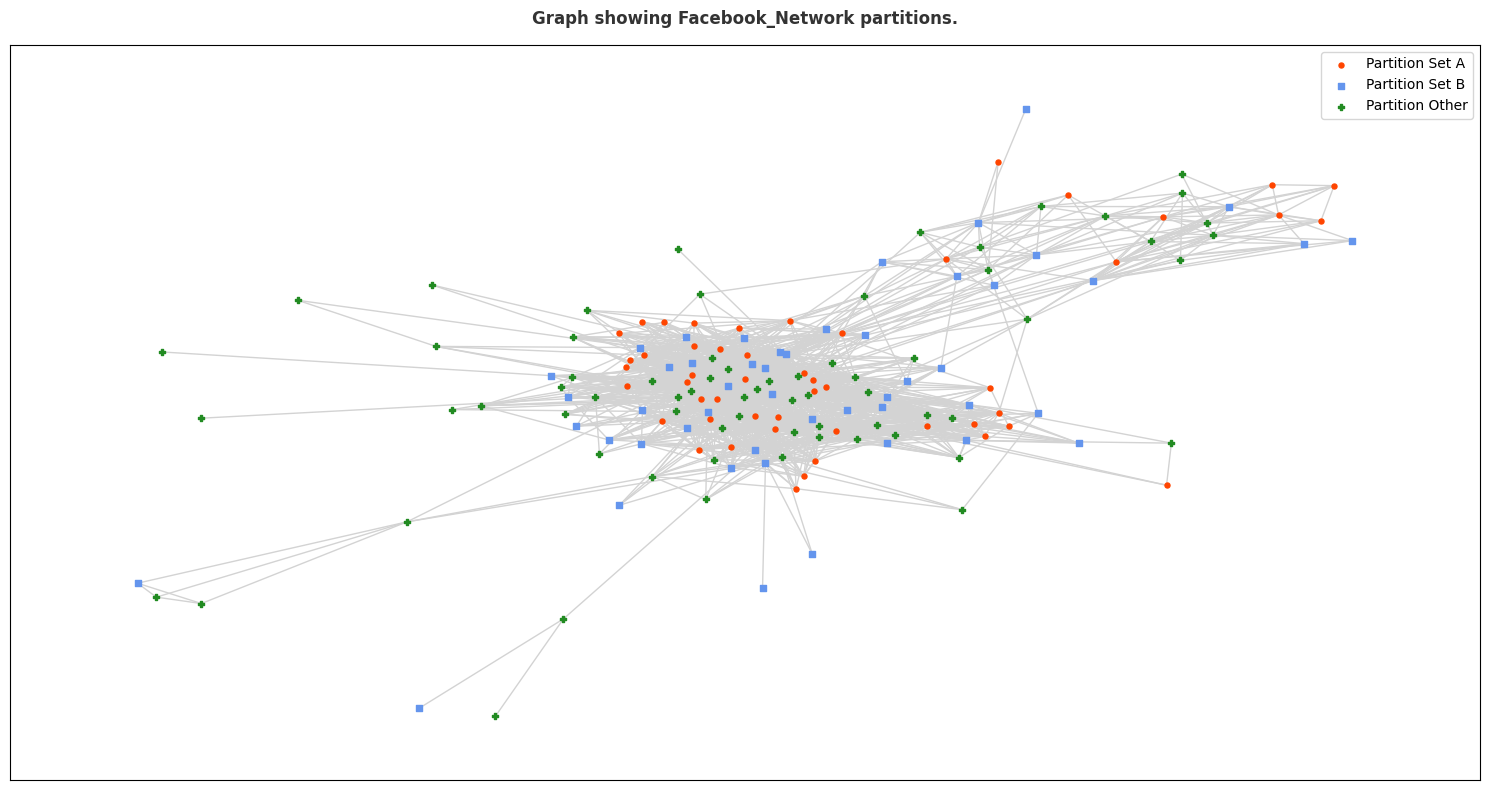

In [27]:
plot_graph_partitions(graph=graphFacebook, partitions=[setA_nodes, setB_nodes, others], id='Facebook_Network', question='B')

The differences I have observed is that the cut size and conductance between the Sets in question B are higher than the cut size and conductance between the question A set of nodes.

Since the set of nodes in questions A and B are different, it would then mean that sets of edges that have one endpoint in each group for questions A and B will be different. This will lead to different cut sizes for the different questions. And since conductance also depends on cut size, conducatance will as well be different for both questions.

## Question C

### Please output the Laplacian matrix of Facebook-Ego dataset.

In [29]:
# The columns of the returned laplacian matrix will be arranged the way my_nodeList is arranged
my_nodeList = list(graphFacebook.nodes())

laplacian_matrix_FB = nx.laplacian_matrix(graphFacebook, nodelist=my_nodeList)

# visualise the result
np.set_printoptions(threshold=sys.maxsize)
print(laplacian_matrix_FB.toarray())

[[44 -1 -1  0 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1
   0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1 -1 -1
   0 -1 -1 -1 -1  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0 -1  0  0 -1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0
  -1  0 -1  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 -1  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0
  -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1 35 -1  0 -1  0  0  0 -1  0  0 -1 -1  0 -1 -1  0  0  0  0  0  0 -1  0
  -1  0 -1  0  0 -1 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1
   0  0 -1  0 -1 -1  0  0  0  0  0 -1  0  0  0  0 -1 -1  0 -1 -1  0  0  0
   0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
   0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  -1  0  0  0  0  0  0  0  0  0  0  0

<class 'networkx.utils.decorators.argmap'> compilation 21:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


## Question D

### Please return the list of cliques over the entire Facebook-Ego dataset.

In [10]:
# cliques
list_of_cliques = list(nx.enumerate_all_cliques(graphFacebook))

In [28]:
# return result i.e. all cliques (The result makes the file a bit bulky so I chose not to display the outputs)

# Uncomment the print statement below to see result
# print(list_of_cliques)